In [127]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import re


In [128]:
#importing datasets
d1 =pd.read_csv("./dataset1.csv")
d1
d2 = pd.read_csv("./dataset2.csv")
d2

#d1 is dataset1 and d2 is dataset2

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0
...,...,...,...,...,...,...,...
2118,1/06/2018 3:41,6,8.0,20,1.000000,0.0,0
2119,1/06/2018 4:11,6,8.5,7,1.000000,0.0,0
2120,1/06/2018 4:41,6,9.0,6,1.000000,0.0,0
2121,1/06/2018 5:11,6,9.5,7,1.000000,0.0,0


In [129]:
#reading the dataset1, analyzing dtypes
print (d1.shape)
print (d1.head(5))
print (d1.tail())
print(d1.describe(include ="float64"))
print(d1.describe(include ="int64"))
print(d1.describe(include="object"))



(907, 12)
         start_time  bat_landing_to_food habit  rat_period_start  \
0  30/12/2017 18:37            16.000000   rat  30/12/2017 18:35   
1  30/12/2017 19:51             0.074016  fast  30/12/2017 19:50   
2  30/12/2017 19:51             4.000000  fast  30/12/2017 19:50   
3  30/12/2017 19:52            10.000000   rat  30/12/2017 19:50   
4  30/12/2017 19:54            15.000000   rat  30/12/2017 19:50   

     rat_period_end  seconds_after_rat_arrival  risk  reward  month  \
0  30/12/2017 18:38                        108     1       0      0   
1  30/12/2017 19:55                         17     0       1      0   
2  30/12/2017 19:55                         41     0       1      0   
3  30/12/2017 19:55                        111     1       0      0   
4  30/12/2017 19:55                        194     1       0      0   

        sunset_time  hours_after_sunset  season  
0  30/12/2017 16:45            1.870833       0  
1  30/12/2017 16:45            3.100833       0  
2  3

Investigation B 
Do the behaviours described above change following seasonal changes? 
It is known that in winter, alternative food sources are scarce and rat encounters are less frequent. In spring, food is more abundant and rat encounters are more common. To provide answers to both investigations, your team should decide the appropriate data science techniques to use for analysing the following datasets.

In [130]:
#We must see if bat–rat interactions or bat behaviours differ by season.
#Bat behaviour (risk, reward, vigilance time)
#Rat activity (rat arrivals, rat minutes)
#Food availability and see if these vary noticeably between winter and spring.

In [131]:
#counting values for season column in d1
d1['season'].value_counts()

season
1    756
0    151
Name: count, dtype: int64

In [132]:
#grouping for seasonal statistical summary
d1.groupby('season')[['bat_landing_to_food', 'risk', 'reward']].mean()

,bat_landing_to_food,risk,reward
season,,,
0,6.039623,0.562914,0.364238
1,12.846335,0.481481,0.567460


In [133]:
#data cleaning
#finding missing values
d1.isnull().sum()
#let's fill missing values instead of dropping
d1= d1.fillna({'habit':'NA'})
#rechecking the missing values
d1.isnull().sum()



start_time                   0
bat_landing_to_food          0
habit                        0
rat_period_start             0
rat_period_end               0
seconds_after_rat_arrival    0
risk                         0
reward                       0
month                        0
sunset_time                  0
hours_after_sunset           0
season                       0
dtype: int64

In [134]:
#checking for duplicates:
dup1= print(d1.duplicated().sum())
dup2= print(d2.duplicated().sum())

1
0


In [135]:
# dropping the 1duplicate in dataset1
d1 = d1.drop_duplicates(keep='last')

#checking the update
dup1= print(d1.duplicated().sum())

0


In [200]:
#missing values of d2
d2.isnull().sum()

#output- 0 missing values


time                  0
month                 0
hours_after_sunset    0
bat_landing_number    0
food_availability     0
rat_minutes           0
rat_arrival_number    0
dtype: int64

In [217]:
#importing cleaned/processed dataset from Assignment 2 
d1_clean =pd.read_csv("./d1_clean.csv")
d1
d2_clean = pd.read_csv("./d2_clean.csv")
d2


,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0
...,...,...,...,...,...,...,...
2118,1/06/2018 3:41,6,8.0,20,1.000000,0.0,0
2119,1/06/2018 4:11,6,8.5,7,1.000000,0.0,0
2120,1/06/2018 4:41,6,9.0,6,1.000000,0.0,0
2121,1/06/2018 5:11,6,9.5,7,1.000000,0.0,0


In [218]:
#inner merging
merged1 = pd.merge(d1, d2)

# Save the merged dataset to a new CSV file
merged1.to_csv('in_merged_dataset.csv', index=False)


In [219]:
#inner merge data analysis
print("Inner merge shape (number of rows, columns):", merged1.shape)
# Unique months in inner merge
print("Unique months in inner merge:", merged1['month'].unique())
print("Counts per month in inner merge:")
print(merged1['month'].value_counts())



Inner merge shape (number of rows, columns): (20, 594)
Unique months in inner merge: [4]
Counts per month in inner merge:
month
4    20
Name: count, dtype: int64


In [220]:
#data merging
merged2 = pd.merge(d1, d2, how='outer') # outer because tried using the defult inner which deleted everything except the 20 row that overlapped

# Save the merged dataset to a new CSV file
merged2.to_csv('out_merged_dataset.csv', index=False)

#check first few rows
print(merged2.head())

  start_time  bat_landing_to_food habit rat_period_start rat_period_end  \
0        NaN                  NaN   NaN              NaN            NaN   
1        NaN                  NaN   NaN              NaN            NaN   
2        NaN                  NaN   NaN              NaN            NaN   
3        NaN                  NaN   NaN              NaN            NaN   
4        NaN                  NaN   NaN              NaN            NaN   

   seconds_after_rat_arrival  risk  reward  month sunset_time  ...  \
0                        NaN   NaN     NaN      0         NaN  ...   
1                        NaN   NaN     NaN      0         NaN  ...   
2                        NaN   NaN     NaN      0         NaN  ...   
3                        NaN   NaN     NaN      0         NaN  ...   
4                        NaN   NaN     NaN      0         NaN  ...   

   habit_rat_disappear  habit_rat_pick habit_rat_pick_and_bat  \
0                  NaN             NaN                    NaN  

In [221]:
# Check that all months are now present
print("Unique months:", merged2['month'].unique())
print("Shape of merged dataset:", merged2.shape)


Unique months: [0 1 2 3 4 5 6]
Shape of merged dataset: (2967, 594)


In [222]:
#cleaning the new(merged) dataset

merged2.isnull().sum()

#no null values

start_time             2103
bat_landing_to_food    2103
habit                  2103
rat_period_start       2103
rat_period_end         2103
                       ... 
time                    844
bat_landing_number      844
food_availability       844
rat_minutes             844
rat_arrival_number      844
Length: 594, dtype: int64

In [228]:
#EDA
#resuning cleaned Dataset from assignment 2 
# Statistical summary for key columns in d1_clean
print("Summary statistics for Dataset 1 (d1_clean):")
cols_d1_clean = ['risk', 'reward', 'season', 'month', 'bat_landing_to_food', 'seconds_after_rat_arrival']
print(d1_clean[cols_d1_clean].describe(include='all'))

# Statistical summary for key columns in d2
print("\nSummary statistics for Dataset 2 (d2_clean):")
cols_d2_clean = ['bat_landing_number', 'food_availability', 'rat_minutes', 'rat_arrival_number', 'month', 'hours_after_sunset']
print(d2_clean[cols_d2_clean].describe(include='all'))




Summary statistics for Dataset 1 (d1_clean):
             risk      reward      season       month  bat_landing_to_food  \
count  818.000000  818.000000  818.000000  818.000000           818.000000   
mean     0.463325    0.536675    0.820293    3.740831             5.695370   
std      0.498958    0.498958    0.384178    1.222522             6.483649   
min      0.000000    0.000000    0.000000    0.000000             0.010238   
25%      0.000000    0.000000    1.000000    4.000000             1.000000   
50%      0.000000    1.000000    1.000000    4.000000             3.000000   
75%      1.000000    1.000000    1.000000    4.000000             8.000000   
max      1.000000    1.000000    1.000000    5.000000            27.000000   

       seconds_after_rat_arrival  
count                 818.000000  
mean                  280.419315  
std                   240.268580  
min                     0.000000  
25%                    87.250000  
50%                   205.000000  
75%    

In [ ]:
#processing and preparing Habit Column
# Keep only string entries and remove 'NA'
# Keep only valid habit strings: letters + underscores, no digits or commas
d1_clean = d1_clean[d1_clean['habit'].apply(lambda x: isinstance(x, str) 
                          and x.upper() != 'NA' 
                          and bool(re.fullmatch(r'[A-Za-z_]+', x)))]


# Convert to categorical (optional, recommended)
d1_clean['habit'] = d1_clean['habit'].astype('category')

# Check the cleaned habit values
print(d1_clean['habit'].unique())
print(d1_clean['habit'].value_counts().head(30))



['rat', 'fast', 'pick', 'bat_fight', 'rat_and_no_food', ..., 'fight_bat', 'bat_fight_and_rat', 'rat_and_rat', 'not_sure_rat', 'rat_and_bat_and_pick']
Length: 61
Categories (82, object): ['157.0,2.6,349.0,159.3; 572.1,275.7,638.3,360.0', '187.0,152.0,304.0,240.0; 567.9,88.6,621.1,140.3', '218.0,171.0,381.0,269.0; 239.0,106.0,315.0,15..., '243.6,235.6,432.2,329.8; 559.0,244.0,622.0,39..., ..., 'rat_disappear', 'rat_pick', 'rat_pick_and_bat', 'rat_to_bat']
habit
fast               245
rat                221
pick               139
bat                 30
bat_fight           25
bat_and_pick        20
bat_and_rat         19
rat_and_bat         14
rat_pick            14
pick_and_bat         8
pick_and_others      8
rat_and_pick         8
other_bats           7
bats                 7
pick_and_rat         6
pick_bat             6
others               5
all_pick             5
no_food              4
pick_rat             4
both                 4
bat_pick             3
pick_and_all         3
fight  

In [233]:

# Convert to category 
d1_clean['habit'] = d1_clean['habit'].astype('category')

# Create dummy variables
habit_dummies = pd.get_dummies(d1_clean['habit'], prefix='habit')
d1_clean = pd.concat([d1_clean, habit_dummies], axis=1)

# Check the cleaned dataset
print(d1_clean['habit'].unique())
print(d1_clean.head())

['rat', 'fast', 'pick', 'bat_fight', 'rat_and_no_food', ..., 'pick_rat_and_bat', 'bat_fight_and_rat', 'not_sure_rat', '501.0,358.4,636.2,423.4; 476.0,103.0,634.0,20..., 'rat_and_bat_and_pick']
Length: 70
Categories (69, object): ['157.0,2.6,349.0,159.3; 572.1,275.7,638.3,360.0', '187.0,152.0,304.0,240.0; 567.9,88.6,621.1,140.3', '218.0,171.0,381.0,269.0; 239.0,106.0,315.0,15..., '243.6,235.6,432.2,329.8; 559.0,244.0,622.0,39..., ..., 'rat_disappear', 'rat_pick', 'rat_pick_and_bat', 'rat_to_bat']
            start_time  bat_landing_to_food habit     rat_period_start  \
0  2017-12-30 18:37:00            16.000000   rat  2017-12-30 18:35:00   
1  2017-12-30 19:51:00             0.074016  fast  2017-12-30 19:50:00   
2  2017-12-30 19:51:00             4.000000  fast  2017-12-30 19:50:00   
3  2017-12-30 19:52:00            10.000000   rat  2017-12-30 19:50:00   
4  2017-12-30 19:54:00            15.000000   rat  2017-12-30 19:50:00   

        rat_period_end  seconds_after_rat_arrival  ris

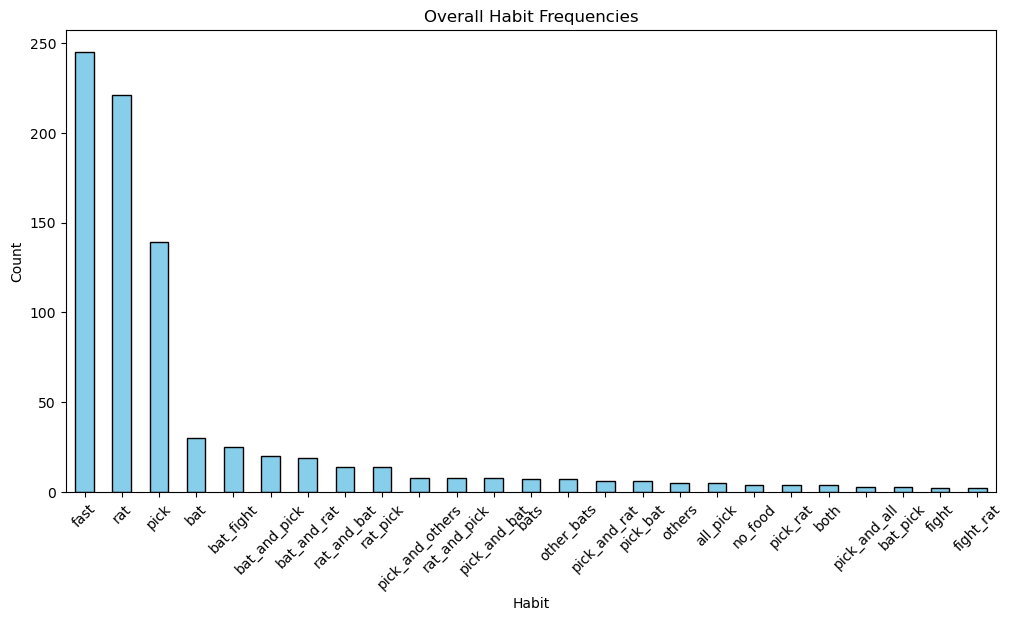

In [236]:
#plotting overall frequencies
# Sort by count for better visualization
habit_counts = d1['habit'].value_counts().sort_values(ascending=False).head(25)

habit_counts.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(12,6))
plt.title('Overall Habit Frequencies')
plt.xlabel('Habit')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/var/folders/wh/xw98sbx17fz88zct2t143p9c0000gn/T/ipykernel_12200/3731408389.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  habit_season_counts_filtered['habit'] = pd.Categorical(


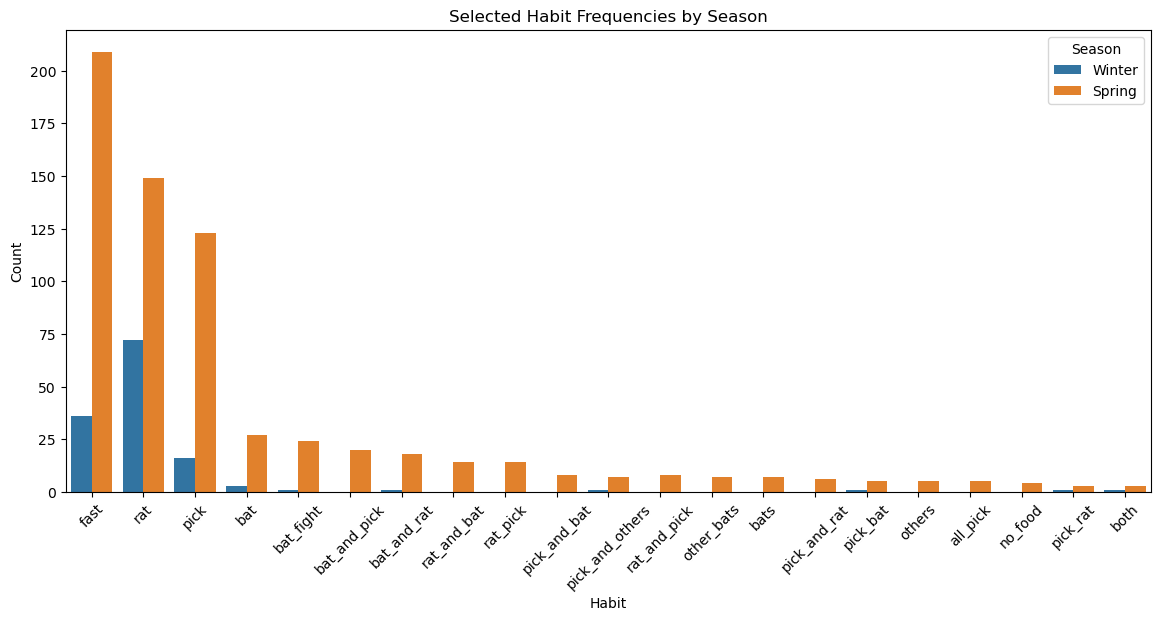

In [239]:
# List of specific habits to show on x-axis
# List of specific habits in the order you want them
selected_habits = [
    'fast', 'rat', 'pick', 'bat', 'bat_fight', 'bat_and_pick', 'bat_and_rat',
    'rat_and_bat', 'rat_pick', 'pick_and_bat', 'pick_and_others', 'rat_and_pick',
    'other_bats', 'bats', 'pick_and_rat', 'pick_bat', 'others', 'all_pick', 
    'no_food', 'pick_rat', 'both'
]

# Filter the dataframe
habit_season_counts_filtered = habit_season_counts[habit_season_counts['habit'].isin(selected_habits)]

# Ensure 'habit' column follows the specific order
habit_season_counts_filtered['habit'] = pd.Categorical(
    habit_season_counts_filtered['habit'],
    categories=selected_habits,
    ordered=True
)

# Plot grouped bar chart
plt.figure(figsize=(14,6))
sns.barplot(x='habit', y='count', hue='season_label', data=habit_season_counts_filtered)
plt.title('Selected Habit Frequencies by Season')
plt.xlabel('Habit')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.show()



In [245]:
#since season is in 0 & 1 categorizing 0 as winter and 1 as Spring
# Map numeric season to labels in the cleaned dataset
d1_clean['season_label'] = d1_clean['season'].map({0: 'Winter', 1: 'Spring'})

# Quick check
print(d1_clean[['season', 'season_label']].head())


   season season_label
0       0       Winter
1       0       Winter
2       0       Winter
3       0       Winter
4       0       Winter


[0 1]
season
1    671
0    147
Name: count, dtype: int64


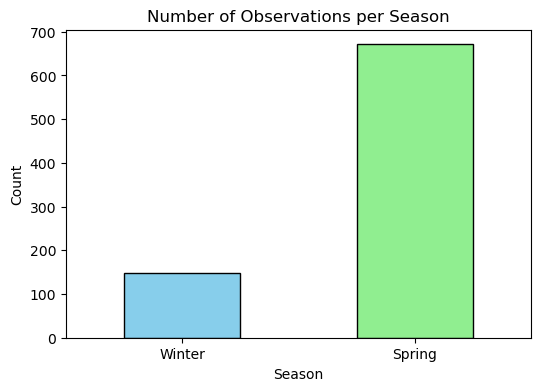

In [ ]:
# Unique values in the 'season' column
print(d1_clean['season'].unique())
print(d1_clean['season'].value_counts())

# Count rows per season
season_counts = d1_clean['season'].value_counts().sort_index()  # ensures 0,1 order

# Map numbers to labels for the x-axis
season_labels = {0: 'Winter', 1: 'Spring'}
season_counts.index = season_counts.index.map(season_labels)

# Plot bar chart
plt.figure(figsize=(6,4))
season_counts.plot(kind='bar', color=['skyblue', 'lightgreen'], edgecolor='black')
plt.title('Number of Observations per Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#this is just showing observation during winter vs spring, no comparision with anything
